# 2 Motional Modes

$$H_0=\eta_x\Omega_x\sigma_x\left(a_x^\dagger e^{i\delta t}+a_xe^{-i\delta t}\right)+\eta_y\Omega_y\sigma_y\left(a_y^\dagger e^{i\delta t}+a_ye^{-i\delta t}\right)$$
$$H_I = \sum_{q = x, y}\delta a_q^\dagger a_q+\eta_q\Omega_q\sigma_q\left(a_q^\dagger+a_q\right)$$

In [1]:
import qutip as qt
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
nMax = 30
times = np.linspace(0, 30, 101)
n0 = 3j
psi = qt.tensor(qt.basis(2, 0), qt.coherent(nMax, n0))
# psi = qt.coherent(nMax, n0)

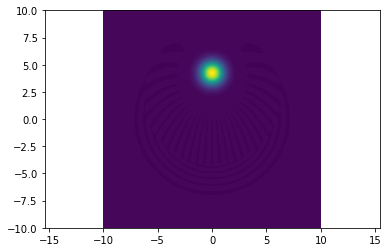

In [3]:
xvec = np.linspace(-10, 10, 200)
yvec = np.linspace(-10, 10, 200)
W_psi = qt.wigner(psi.ptrace([1]), xvec, yvec)

# plot the results

# fig, axes = plt.subplots(1, 3, figsize=(24, 8))

plt.contourf(xvec, yvec, W_psi, 100)
plt.axis("equal")
plt.show()

## Test 2d case Wigner func

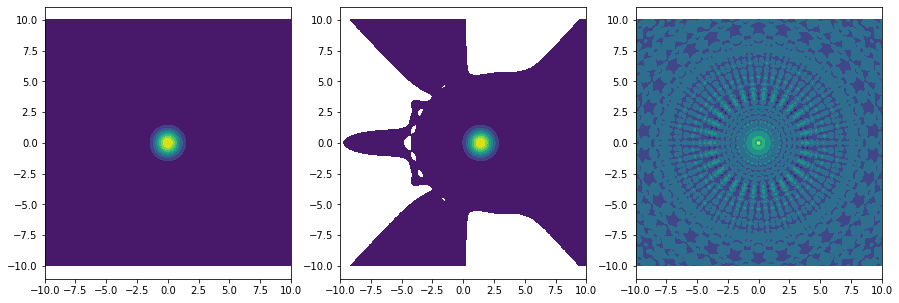

In [9]:
nMax = 30

psi_2d = qt.tensor(qt.ket2dm(qt.coherent(nMax, 1)), qt.ket2dm(qt.coherent(nMax, 0)))
psi_x = psi_2d.ptrace(1)
psi_y = psi_2d.ptrace(0)

W_x = qt.wigner(psi_x, xvec, yvec)
W_y = qt.wigner(psi_y, xvec, yvec)
W_2d = qt.wigner(psi_2d, xvec, yvec)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].contourf(xvec, yvec, W_x)
axes[0].axis('equal')
axes[1].contourf(xvec, yvec, W_y)
axes[1].axis('equal')
axes[2].contourf(xvec, yvec, W_2d)
axes[2].axis('equal')
plt.show()
# [W_x[0], W_y[0]]
# W_x

## 1d case:

In [4]:
def H_1d(Omega, delta, psi_0, gamma, eta=0.1, n0=0):
    H_x1 = eta*Omega*qt.tensor(qt.sigmax(), qt.create(nMax))
    def H_x1_coeff(t, args):
        return np.exp(1j*delta*t)
    H_x2 = eta*Omega*qt.tensor(qt.sigmax(), qt.destroy(nMax))
    def H_x2_coeff(t, args):
        return np.exp(-1j*delta*t)
    H = H_x1+H_x2
    
    H = [[H_x1, H_x1_coeff], [H_x2, H_x2_coeff]]
    
    c_ops = []#[gamma**qt.tensor(qt.basis(2, 0)*qt.basis(2, 1).dag(), qt.qeye(nMax))]

#     H = eta*Omega*qt.tensor(qt.sigmax(), (qt.create(nMax))+qt.destroy(nMax))
    
    result = qt.mesolve(H, psi_0, times, c_ops, [])
    return result.states

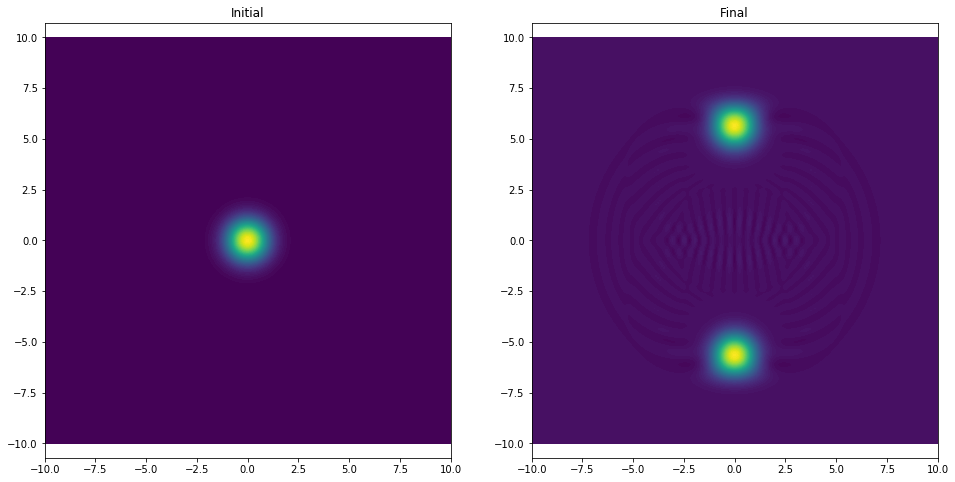

In [10]:
Omega = 1
delta = 0.
gamma = 0
times = np.linspace(0, 40, 101)
psi = qt.tensor(qt.fock(2, 0), qt.coherent(nMax, 0))

psi_f = H_1d(Omega, delta, psi, gamma)[-1].ptrace(1)
W_i = qt.wigner(psi.ptrace(1), xvec, yvec)
W_f = qt.wigner(psi_f, xvec, yvec)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
cont0 = axes[0].contourf(xvec, yvec, W_i, 100)
axes[0].axis('equal')
axes[0].set_title('Initial')
cont1 = axes[1].contourf(xvec, yvec, W_f, 100)
axes[1].axis('equal')
axes[1].set_title('Final')
plt.show()
# W_f

## 2d case:

In [39]:
def H_2d(Omega_x, Omega_y, delta, times, timeTurnOn_y=0, eta=0.1, n0=0):
    H_x1 = eta*Omega_x*qt.tensor(qt.tensor(qt.sigmax(), qt.create(nMax)), qt.qeye(nMax))
    def H_x1_coeff(t, args):
        return np.exp(1j*delta*t)
    H_x2 = eta*Omega_x*qt.tensor(qt.tensor(qt.sigmax(), qt.destroy(nMax)), qt.qeye(nMax))
    def H_x2_coeff(t, args):
        return np.exp(-1j*delta*t)
    H_y1 = eta*Omega_y*qt.tensor(qt.tensor(qt.sigmay(), qt.qeye(nMax)), qt.create(nMax))
    def H_y1_coeff(t, args):
        if t < timeTurnOn_y:
            return 0
        else:
            return np.exp(1j*delta*t)
    H_y2 = eta*Omega_y*qt.tensor(qt.tensor(qt.sigmay(), qt.qeye(nMax)), qt.destroy(nMax))
    def H_y2_coeff(t, args):
        if t < timeTurnOn_y:
            return 0
        else:
            return np.exp(-1j*delta*t)
    H = [[H_x1, H_x1_coeff], [H_x2, H_x2_coeff], [H_y1, H_y1_coeff], [H_y2, H_y2_coeff]]
    
    psi_0 = qt.tensor(qt.tensor(qt.basis(2, 0), qt.coherent(nMax, n0)), qt.coherent(nMax, n0))
    
    result = qt.mesolve(H, psi_0, times, [], [])
    return result.states

In [42]:
def timeScan_2d(t_start,
                t_stop,
                Nsample,
                Omega_x,
                Omega_y,
                delta,
                timeTurnOn_y=0
               ):
    times = np.linspace(t_start, t_stop, Nsample)
    n = 0

    psi_2d_f = H_2d(Omega_x, Omega_y, delta, times, timeTurnOn_y = timeTurnOn_y, n0=n)[-1]
    psi_2d_f_x = psi_2d_f.ptrace(1)
    psi_2d_f_y = psi_2d_f.ptrace(2)
    # W_2d_f = qt.wigner(psi_2d_f, xvec, yvec)
    W_2d_f_x = qt.wigner(psi_2d_f_x, xvec, yvec)
    W_2d_f_y = qt.wigner(psi_2d_f_y, xvec, yvec)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    cont0 = axes[0].contourf(xvec, yvec, W_2d_f_x, 100)
    axes[0].axis('equal')
    axes[0].set_title('x')
    cont1 = axes[1].contourf(xvec, yvec, W_2d_f_y, 100)
    axes[1].axis('equal')
    axes[1].set_title('y')
    plt.show()

delta =  -0.4


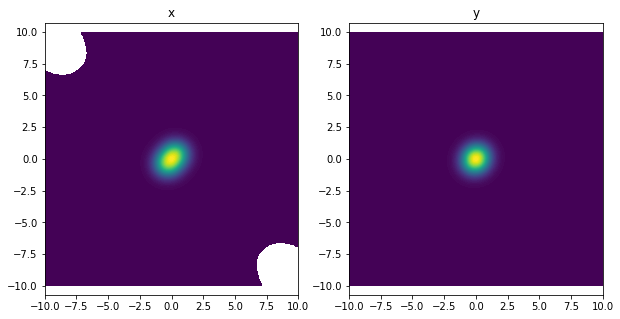

delta =  -0.36000000000000004


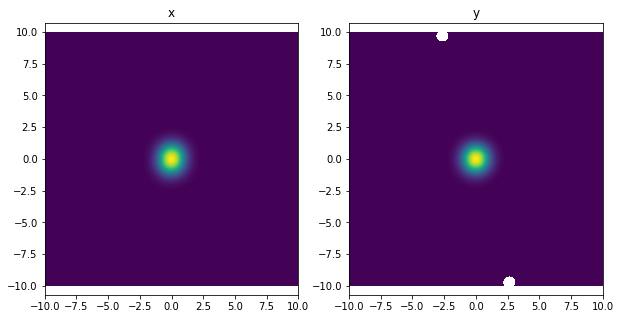

delta =  -0.32


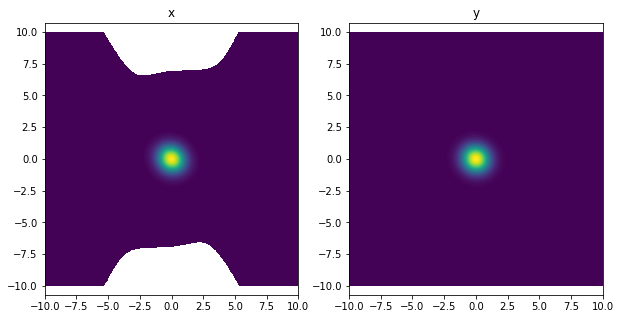

delta =  -0.28


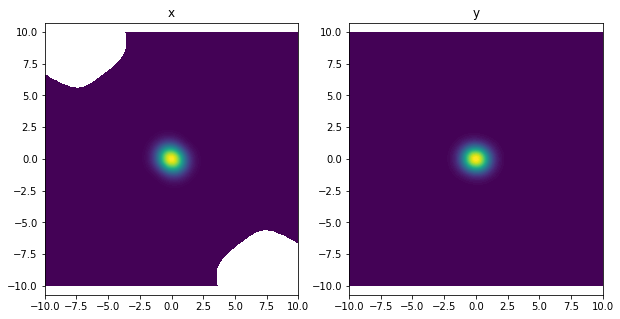

delta =  -0.24000000000000002


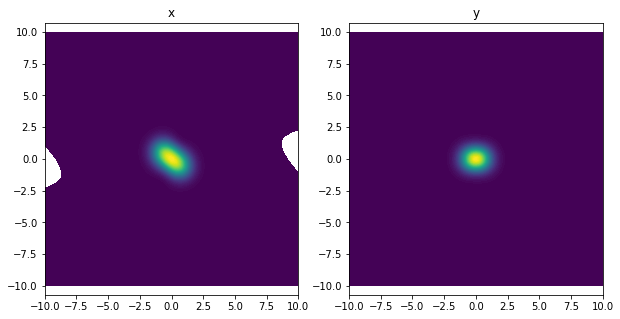

delta =  -0.2


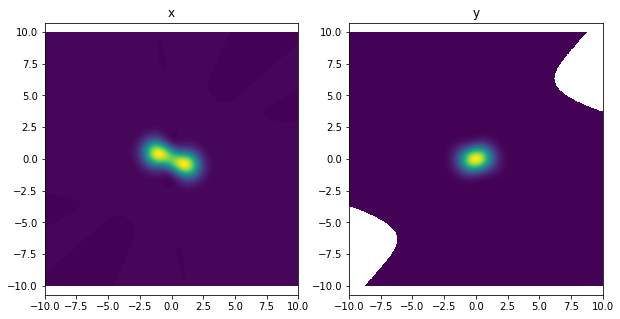

delta =  -0.16000000000000003


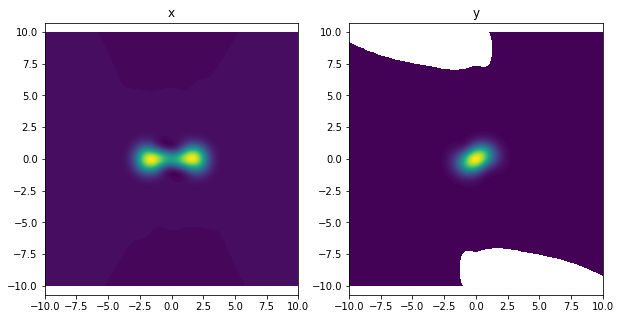

delta =  -0.12


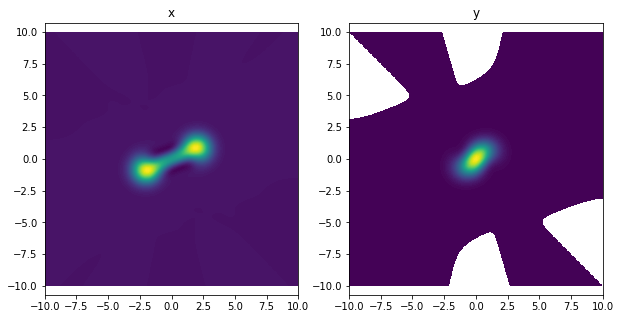

delta =  -0.08000000000000002


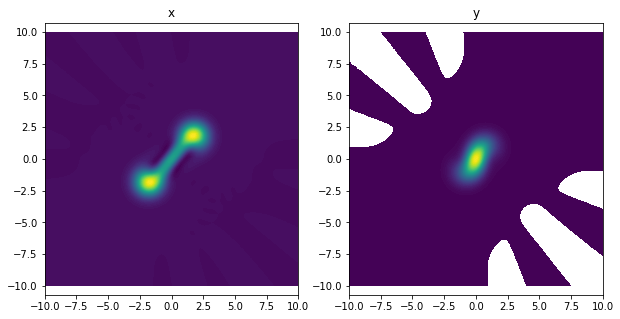

delta =  -0.040000000000000036


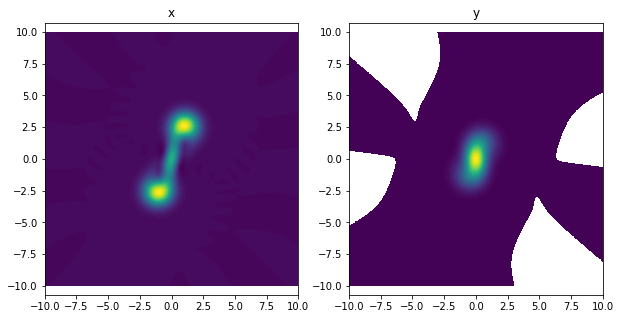

delta =  0.0


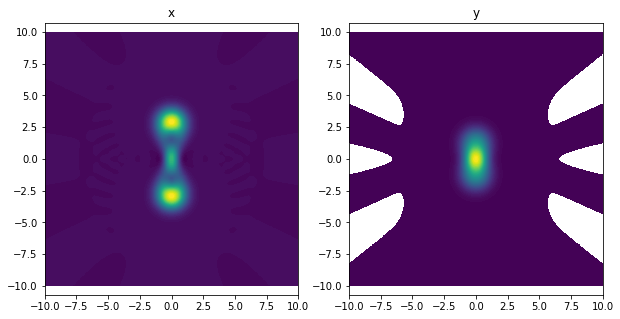

delta =  0.03999999999999998


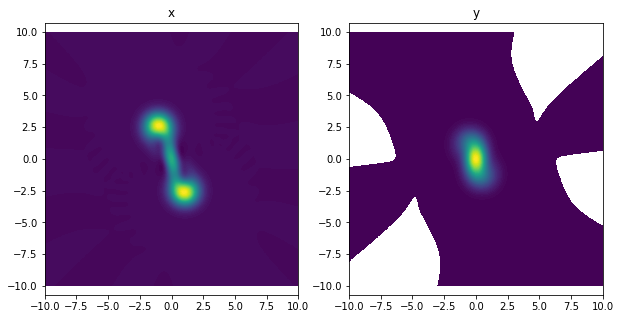

delta =  0.07999999999999996


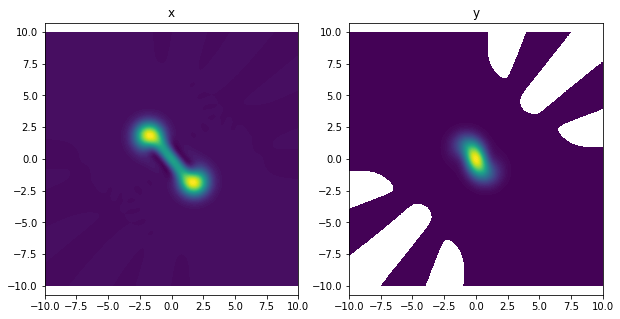

delta =  0.12


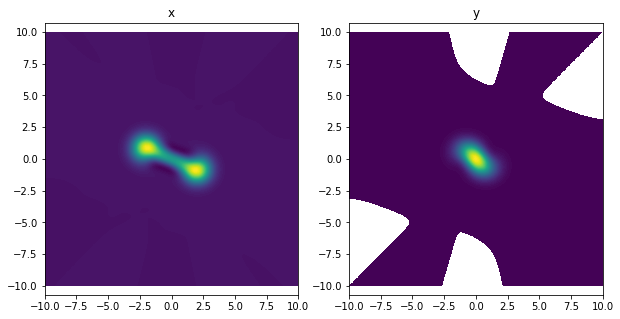

delta =  0.16000000000000003


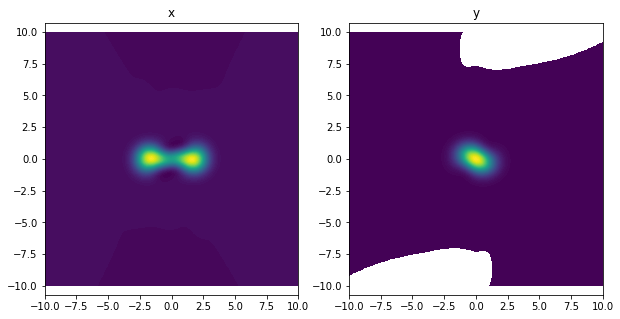

delta =  0.19999999999999996


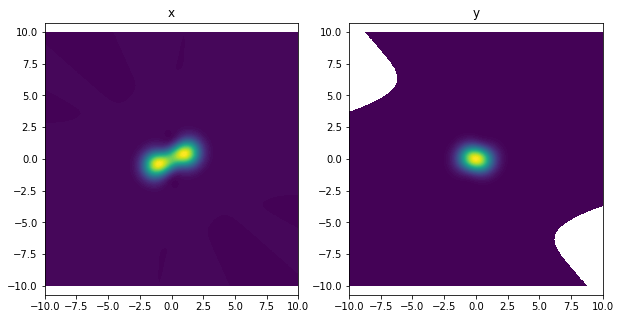

delta =  0.24


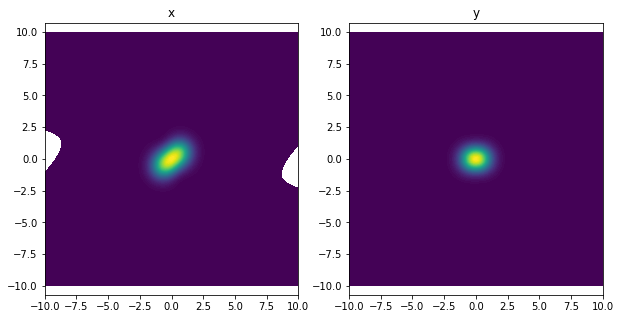

delta =  0.28


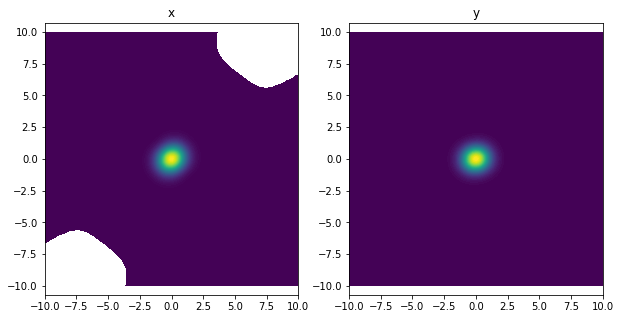

delta =  0.31999999999999995


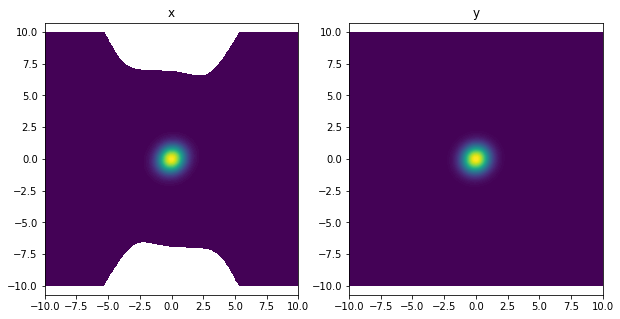

delta =  0.36


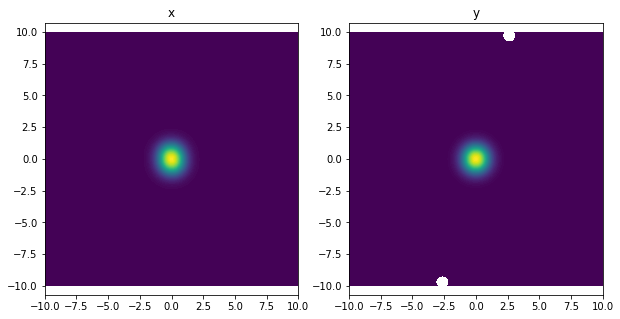

delta =  0.4


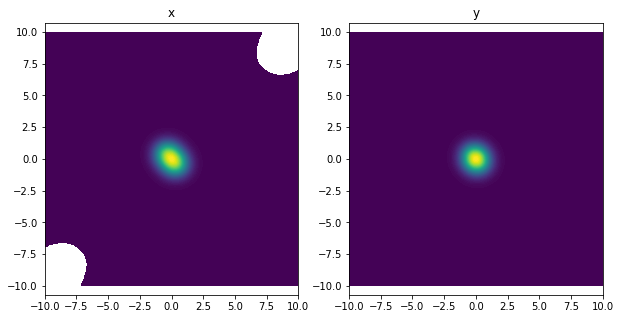

In [43]:
deltas = np.linspace(-0.4,0.4,21)
for delta in deltas:
    print('delta = ', delta)
    timeScan_2d(t_start = 0,
            t_stop = 20,
            Nsample = 101,
            Omega_x = 1,
            Omega_y = 0.5,
            delta = delta)

### Scan time for small y and large y
Turn on y when t = 15

time =  1.0


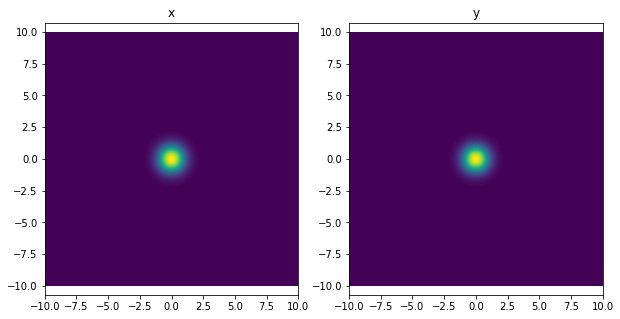

time =  3.0


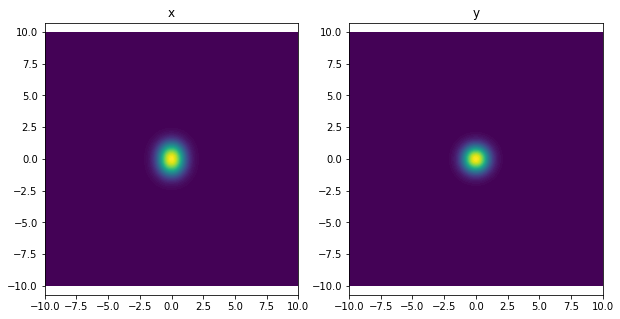

time =  5.0


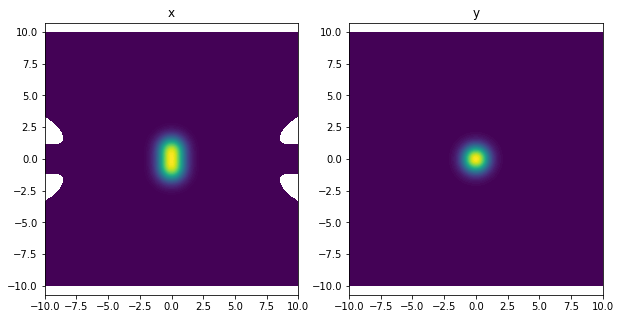

time =  7.0


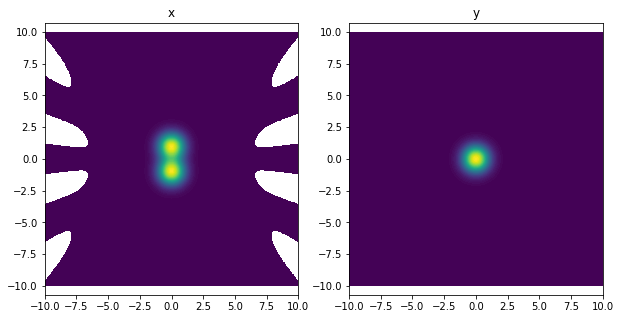

time =  9.0


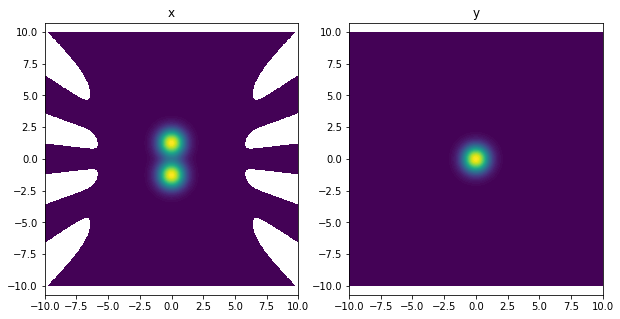

time =  11.0


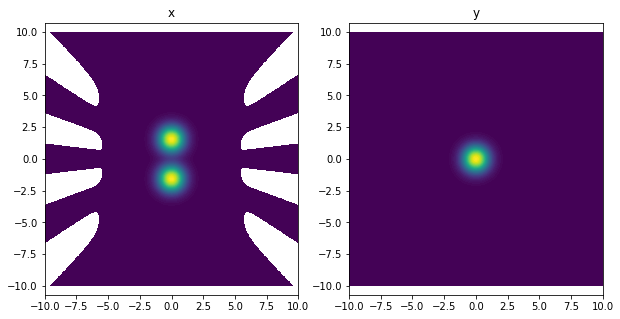

time =  13.0


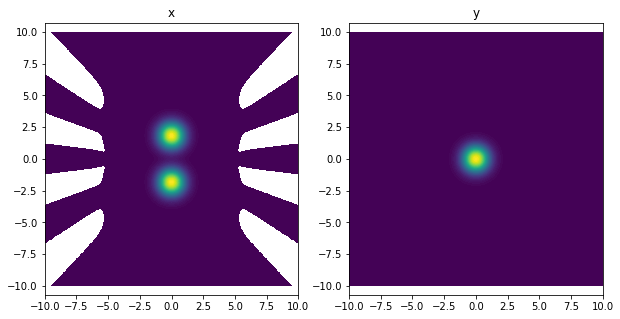

time =  15.0


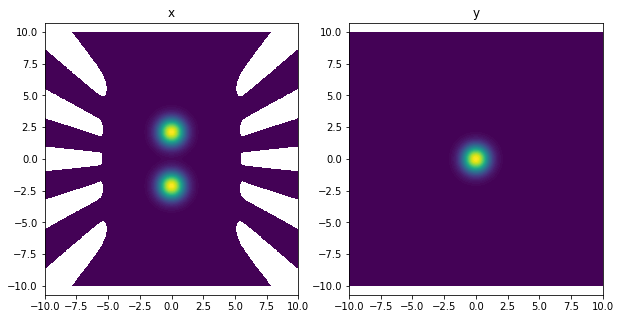

time =  17.0


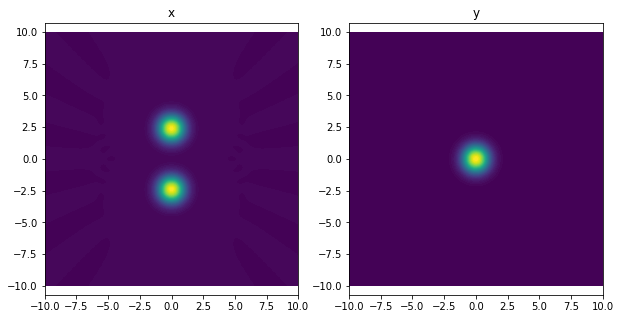

time =  19.0


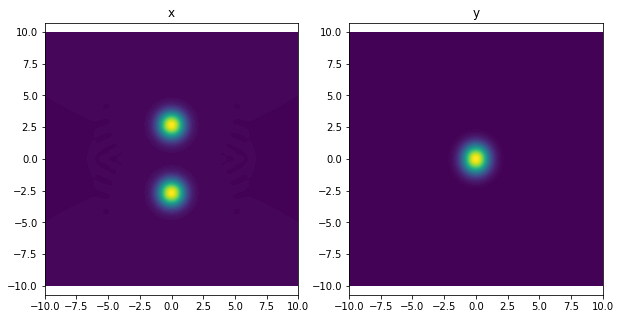

time =  21.0


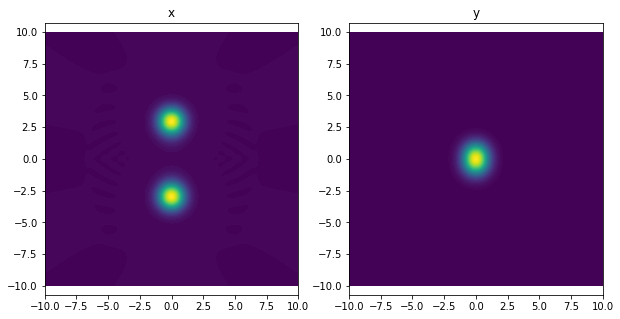

time =  23.0


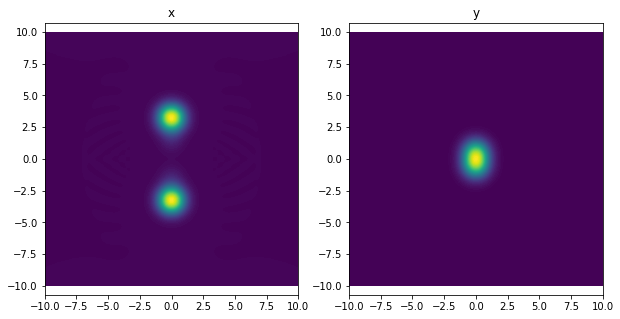

time =  25.0


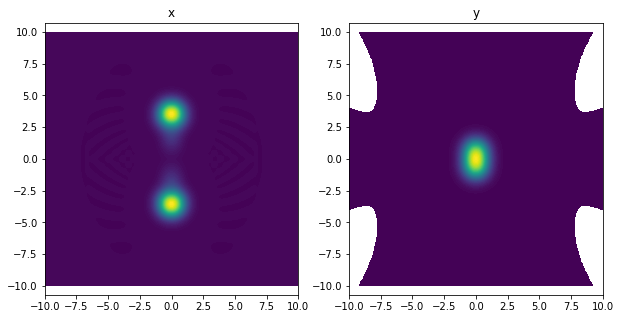

time =  27.0


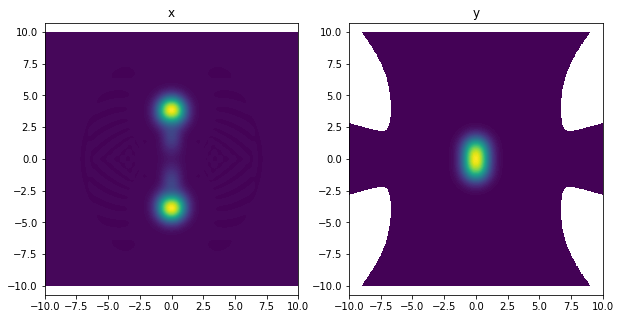

time =  29.0


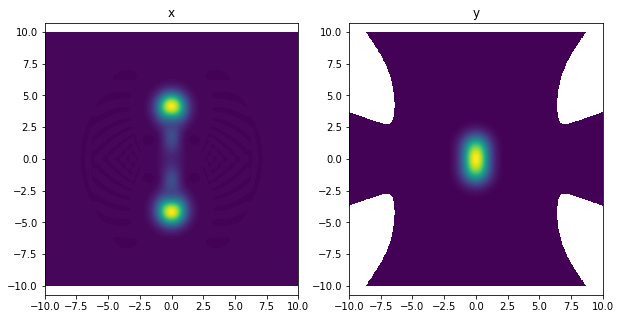

time =  31.0


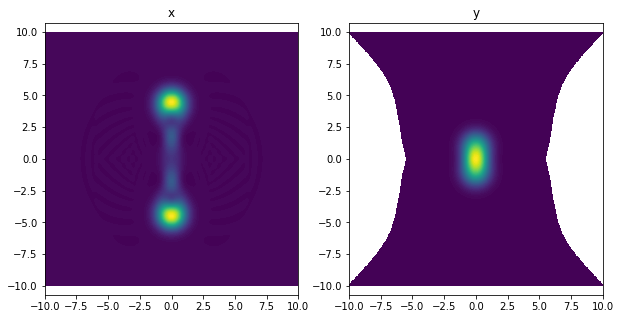

time =  33.0


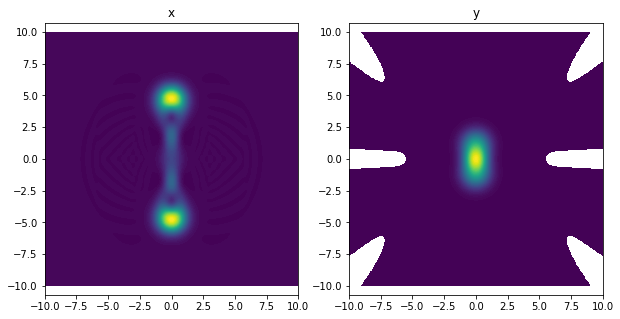

time =  35.0


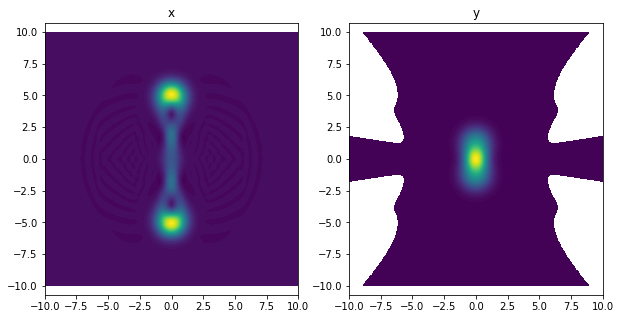

time =  37.0


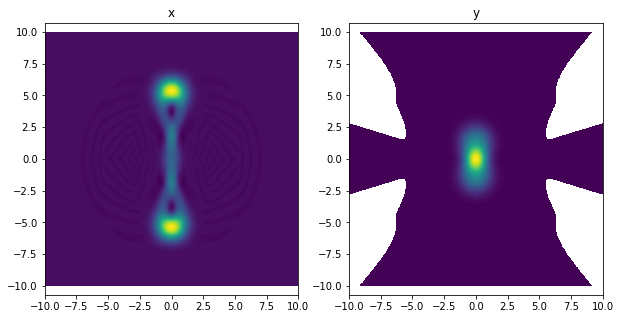

time =  39.0


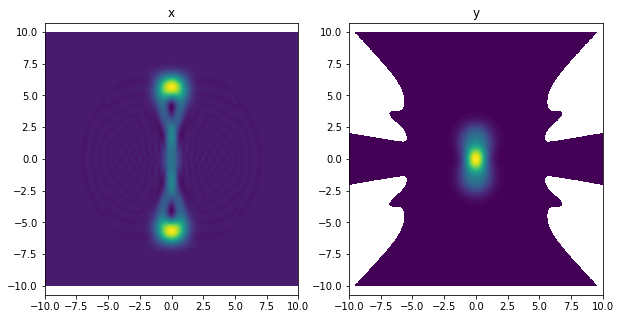

time =  41.0


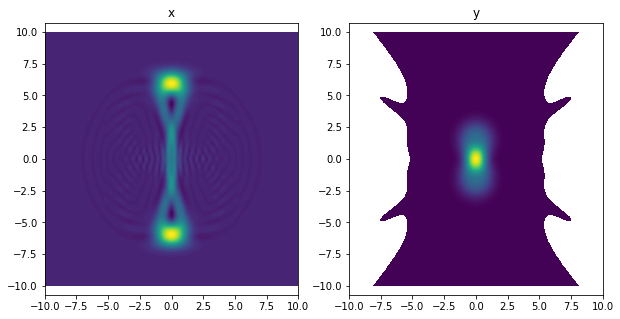

time =  43.0


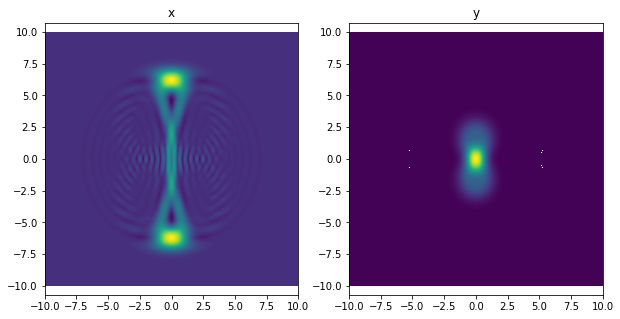

time =  45.0


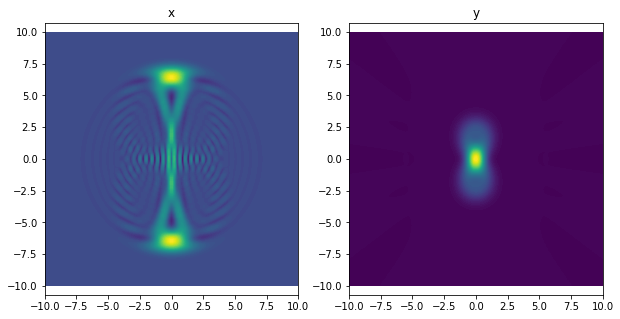

time =  47.0


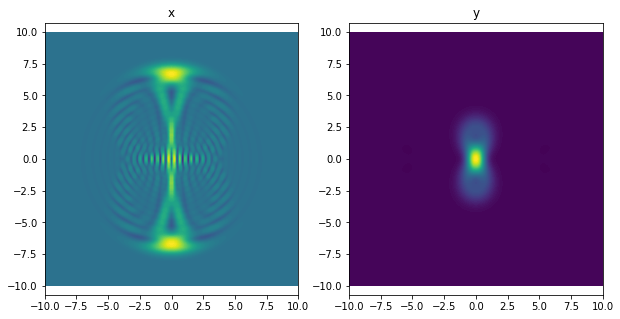

time =  49.0


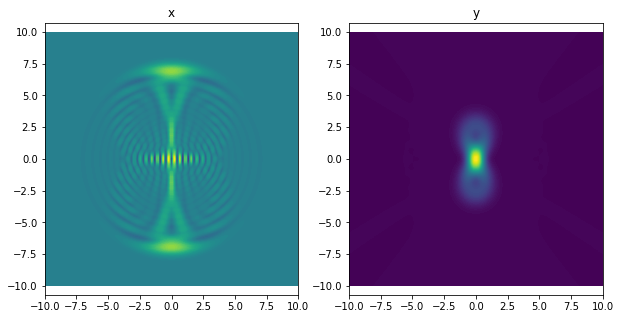

time =  51.0


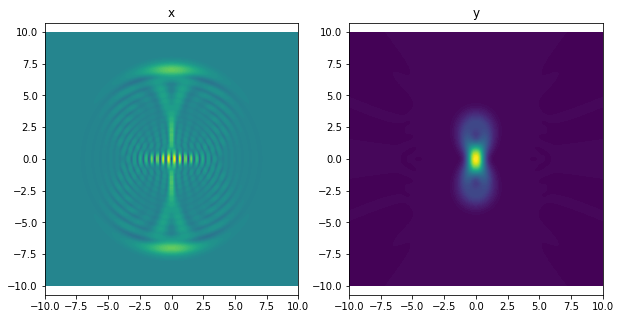

time =  53.0


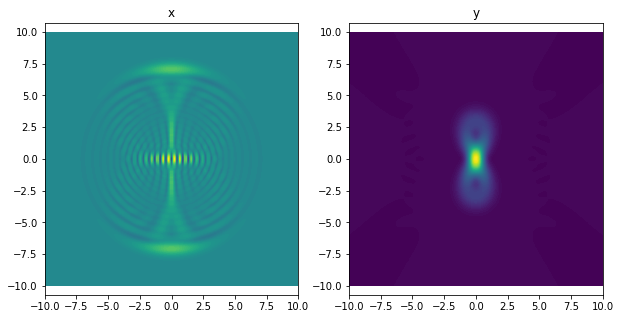

time =  55.0


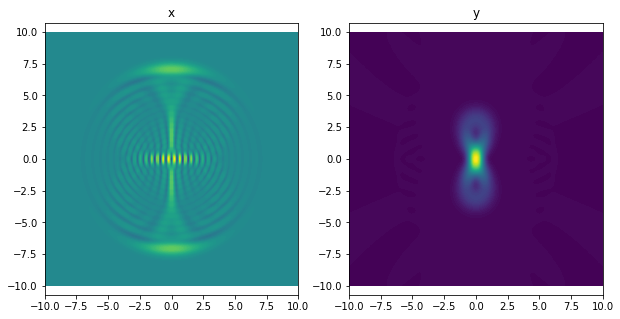

time =  57.0


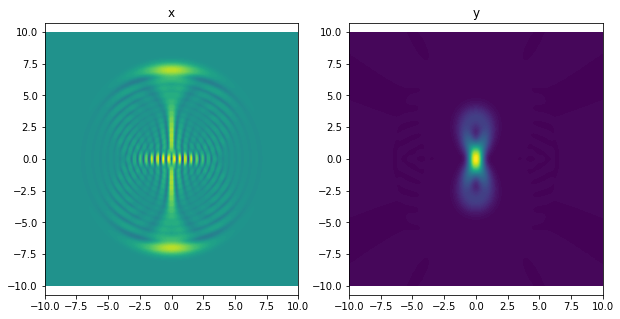

time =  59.0


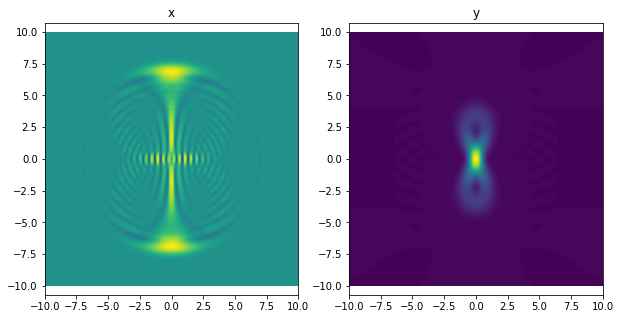

time =  61.0


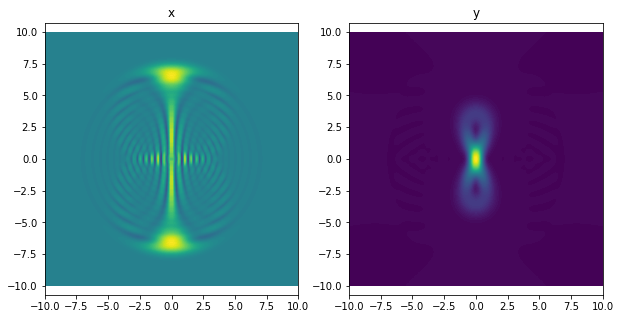

time =  63.0


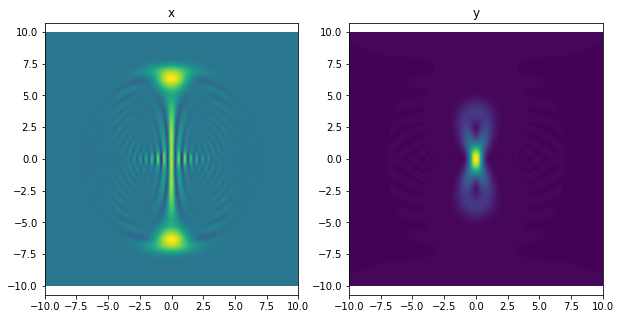

time =  65.0


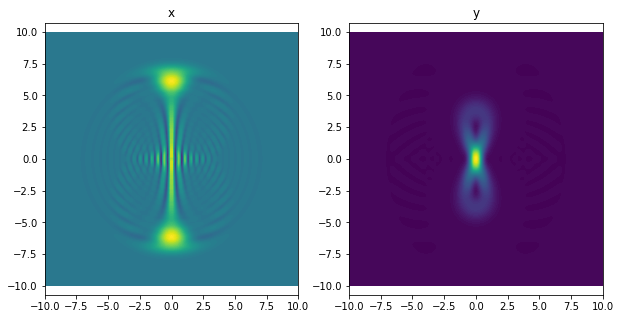

time =  67.0


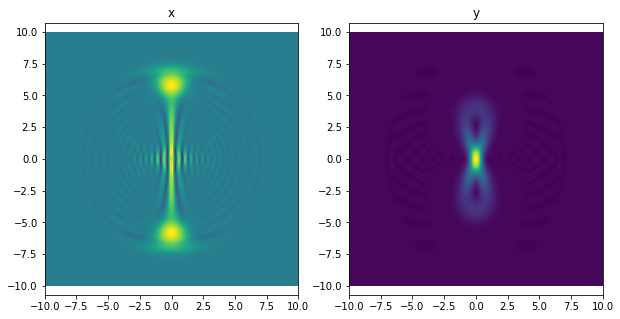

time =  69.0


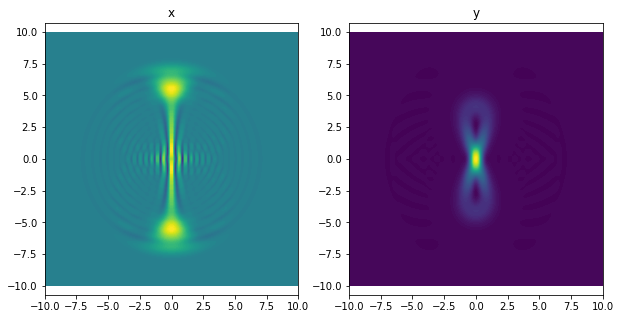

time =  71.0


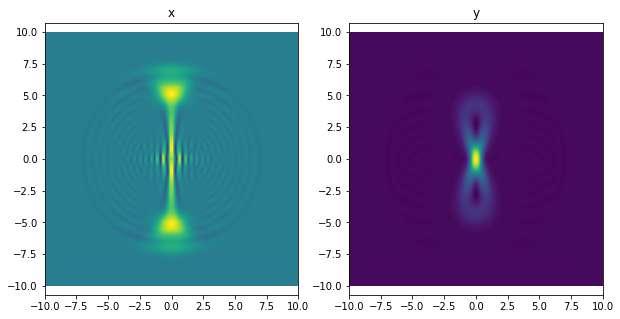

time =  73.0


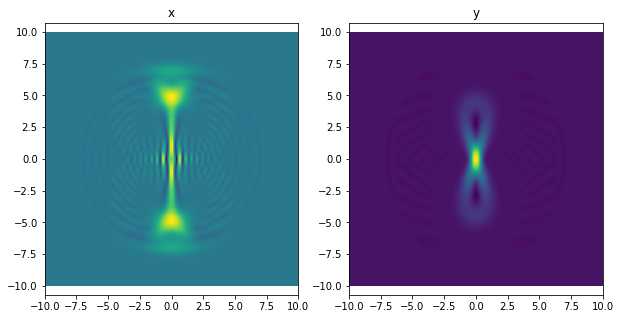

time =  75.0


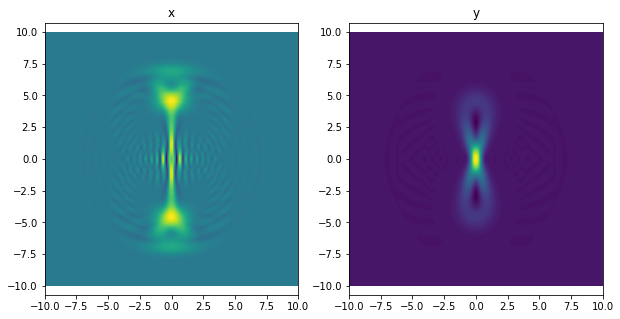

time =  77.0


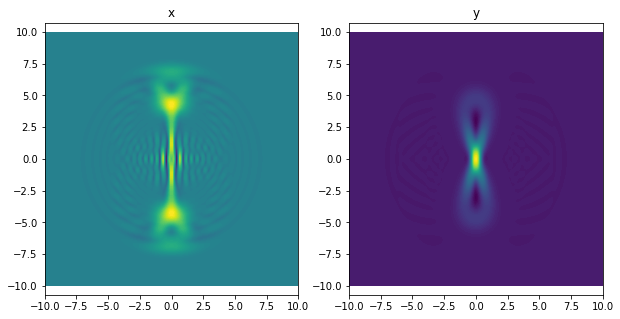

time =  79.0


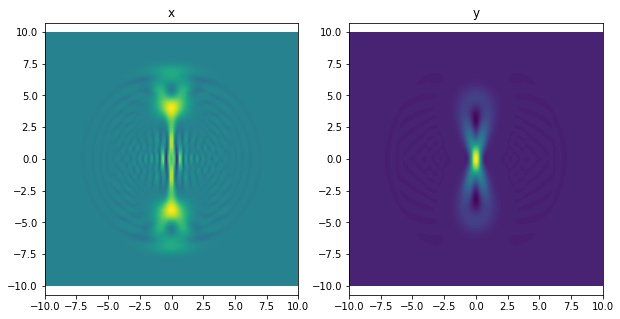

In [49]:
t_list = np.linspace(1,79,40)
for t in t_list:
    print('time = ', t)
    timeScan_2d(t_start = 0,
                t_stop = t,
                Nsample = 101,
                Omega_x = 1,
                Omega_y = 0.5,
                delta = 0,
                timeTurnOn_y=15)

time =  1.0


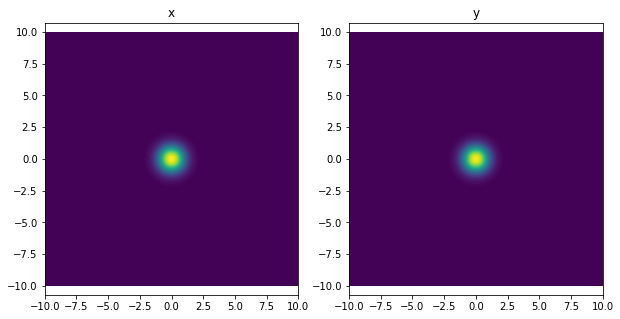

time =  3.0


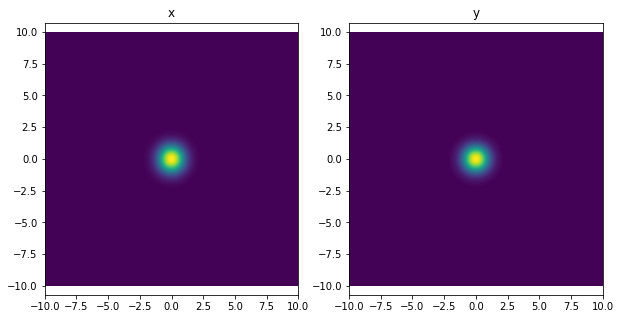

time =  5.0


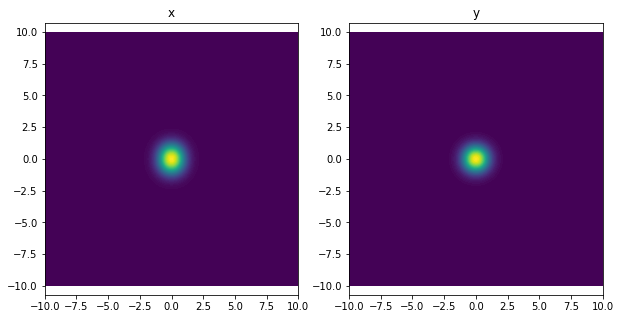

time =  7.0


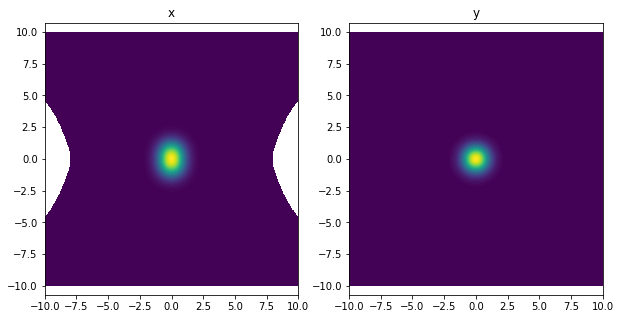

time =  9.0


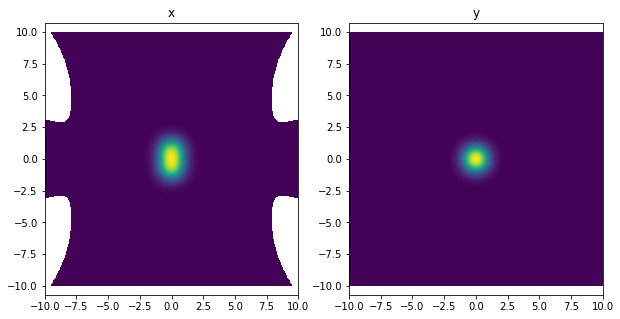

time =  11.0


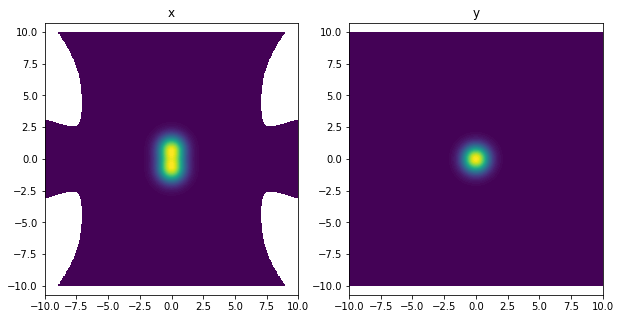

time =  13.0


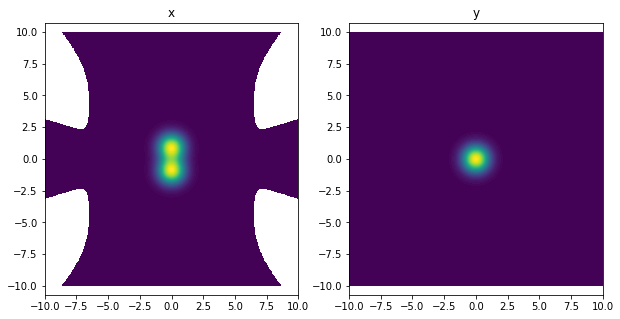

time =  15.0


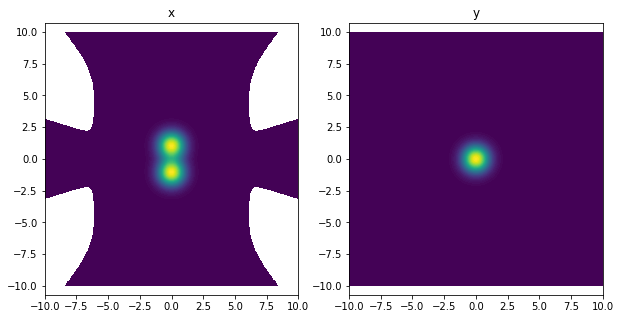

time =  17.0


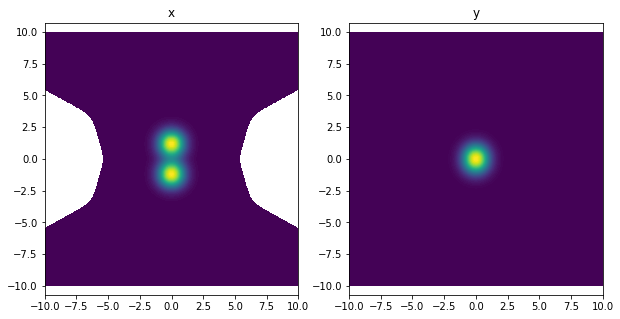

time =  19.0


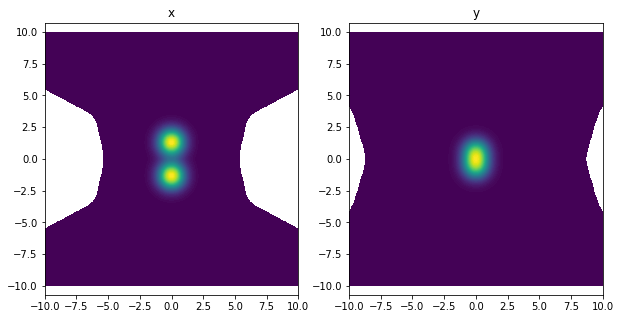

time =  21.0


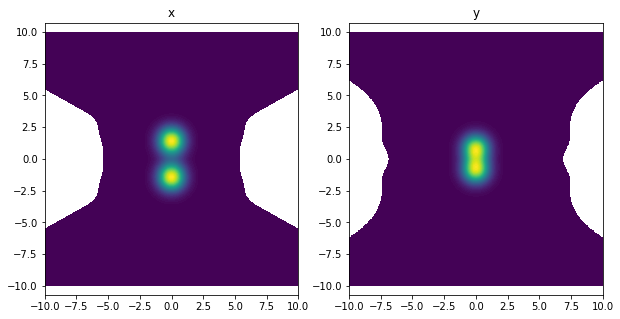

time =  23.0


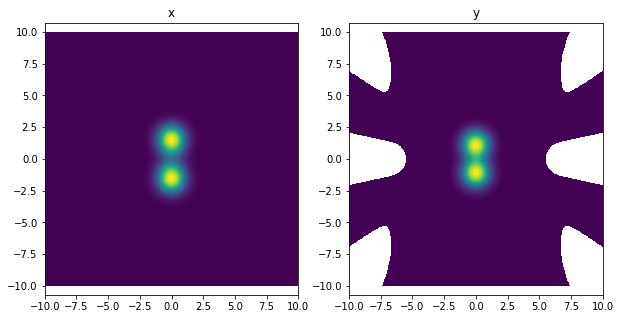

time =  25.0


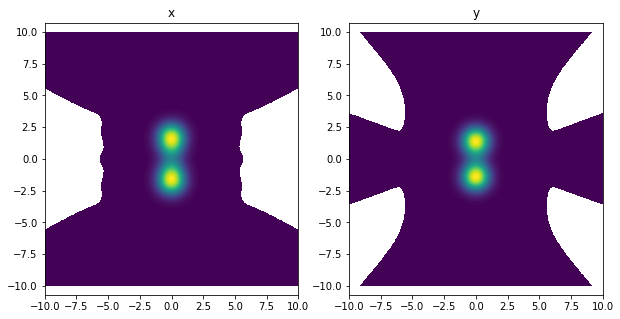

time =  27.0


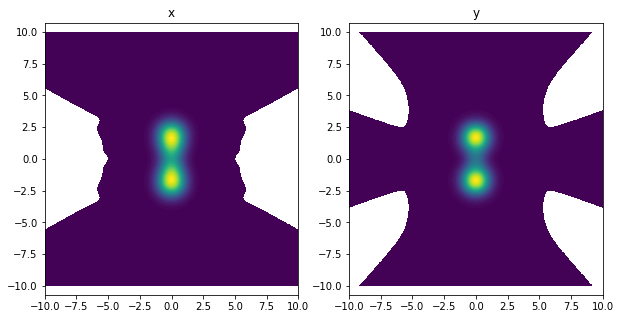

time =  29.0


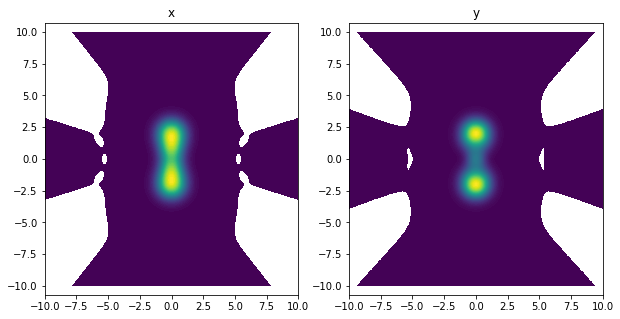

time =  31.0


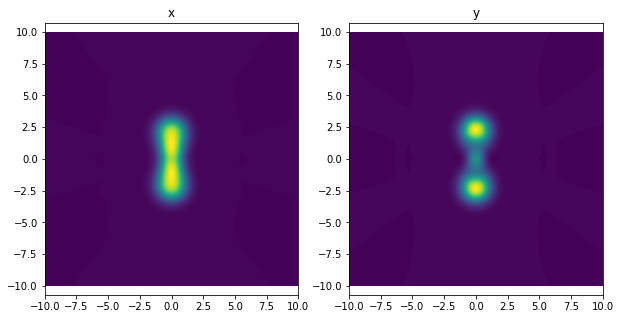

time =  33.0


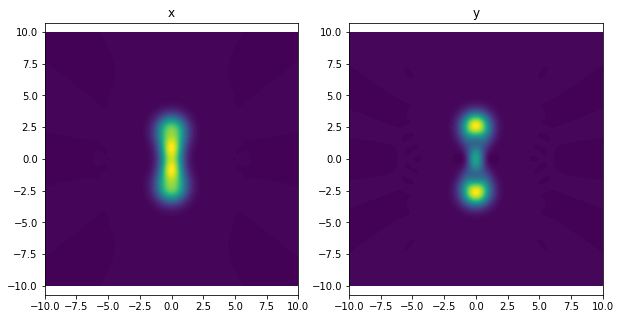

time =  35.0


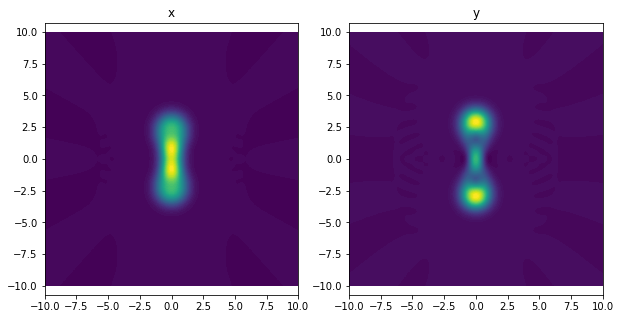

time =  37.0


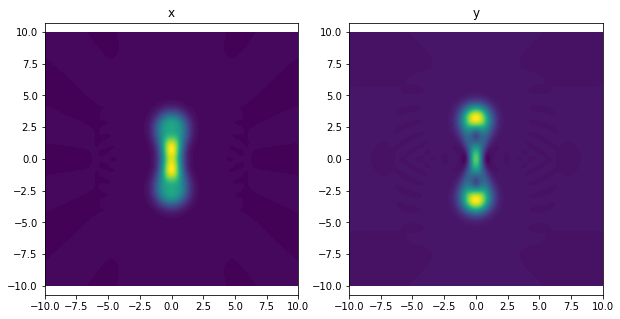

time =  39.0


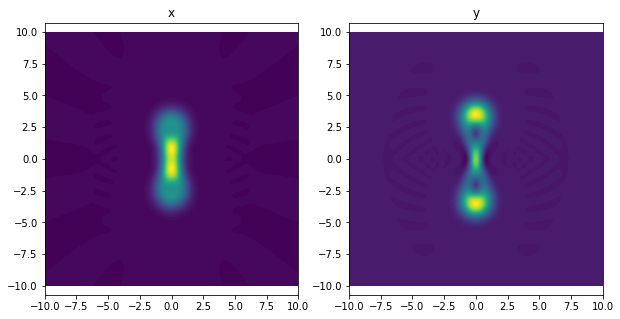

time =  41.0


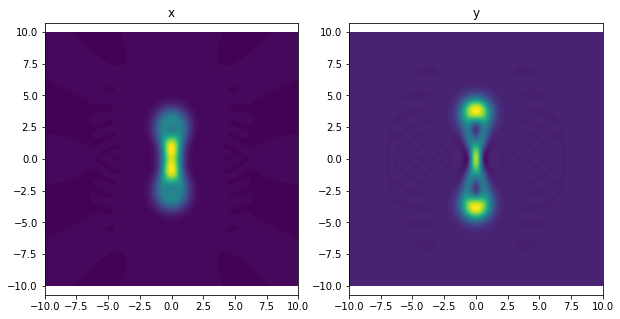

time =  43.0


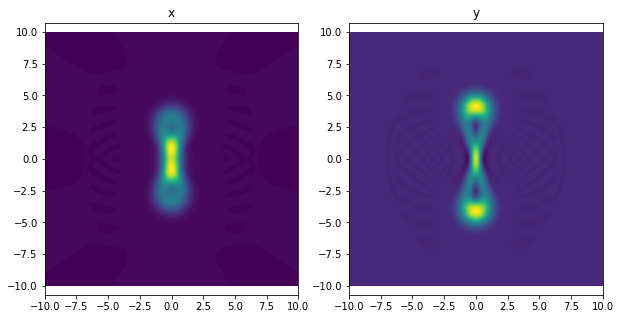

time =  45.0


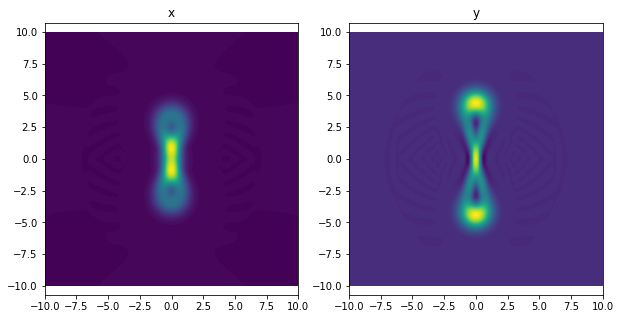

time =  47.0


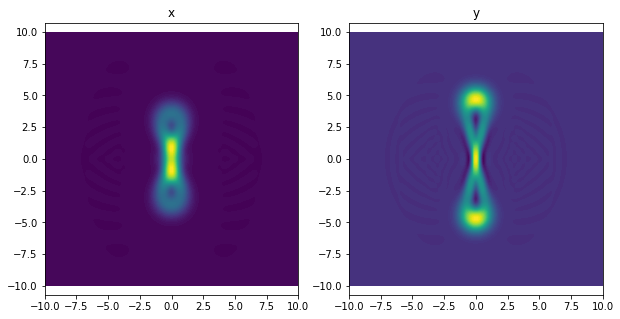

time =  49.0


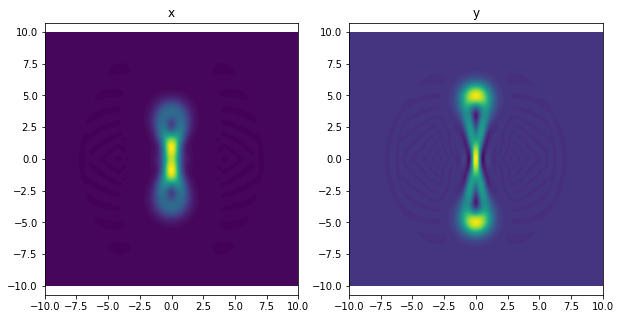

time =  51.0


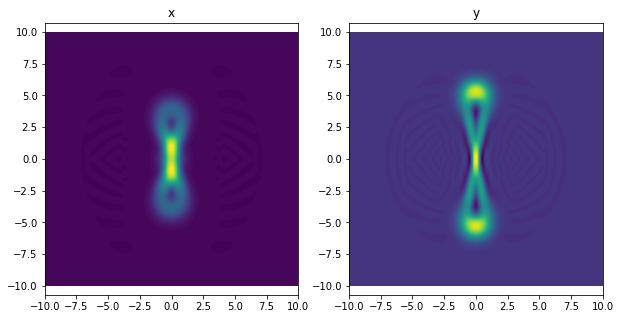

time =  53.0


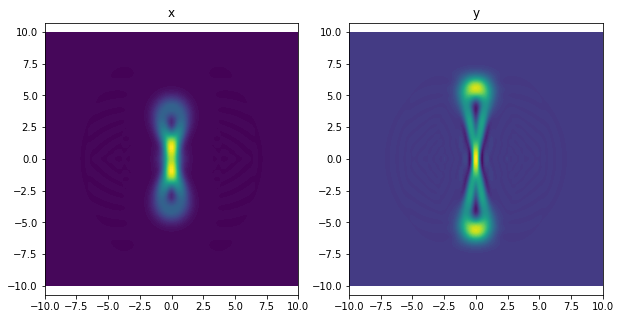

time =  55.0


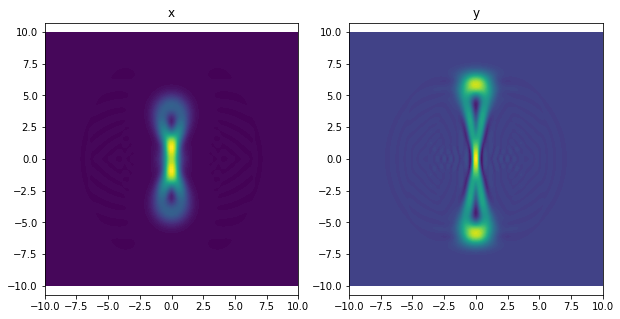

time =  57.0


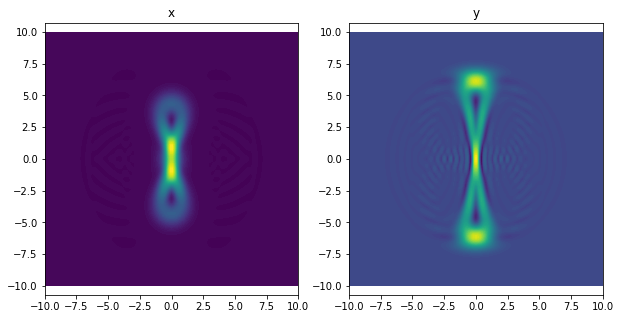

time =  59.0


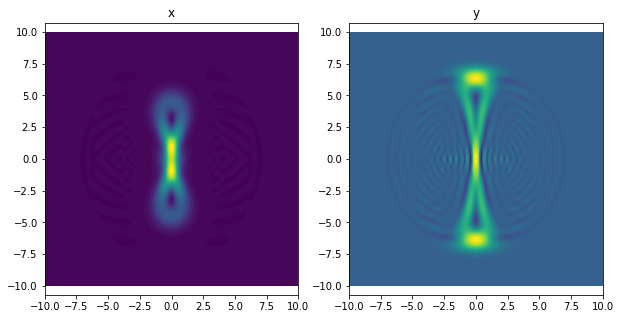

time =  61.0


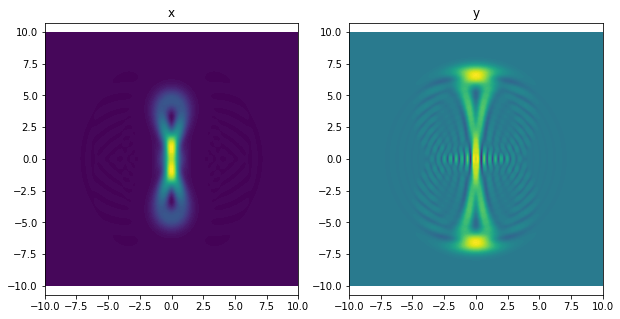

time =  63.0


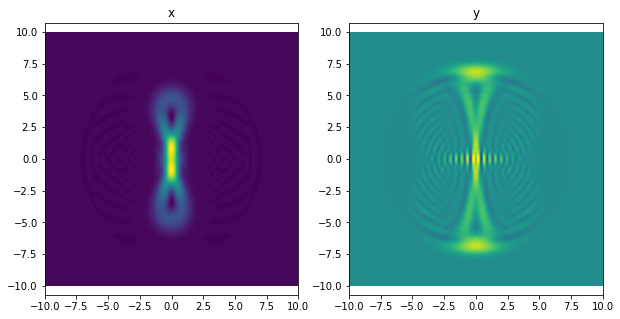

time =  65.0


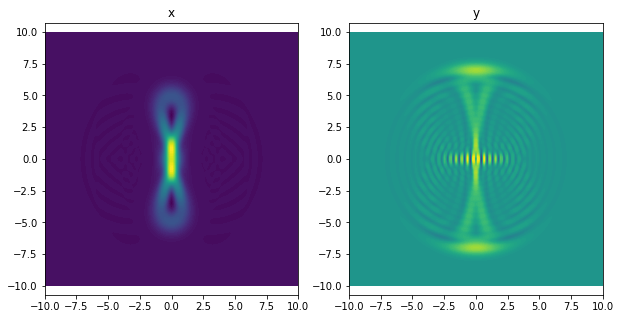

time =  67.0


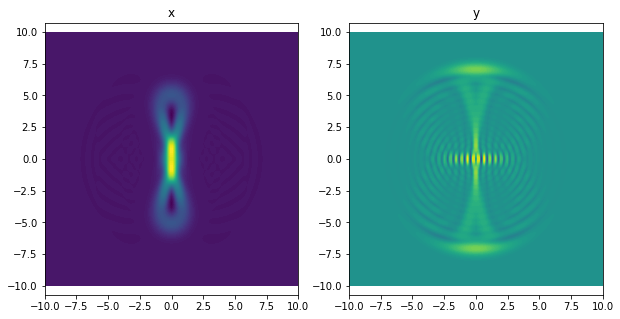

time =  69.0


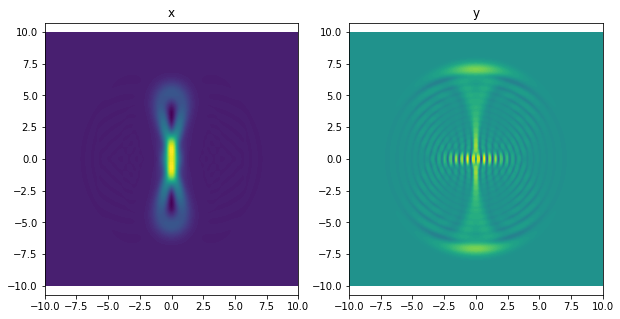

time =  71.0


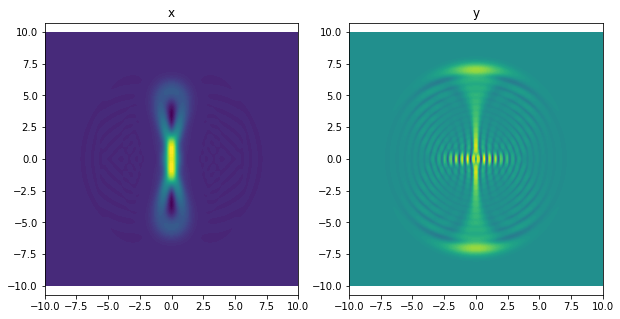

time =  73.0


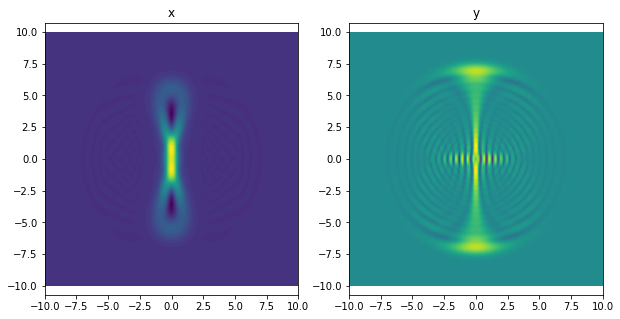

time =  75.0


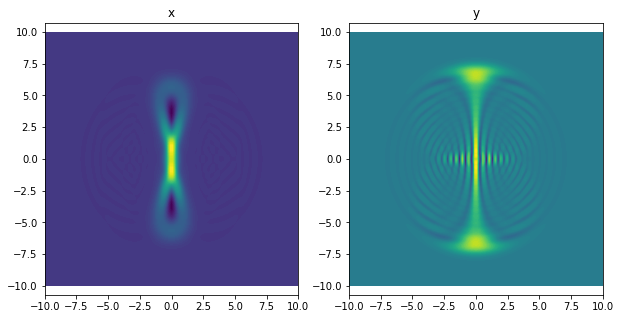

time =  77.0


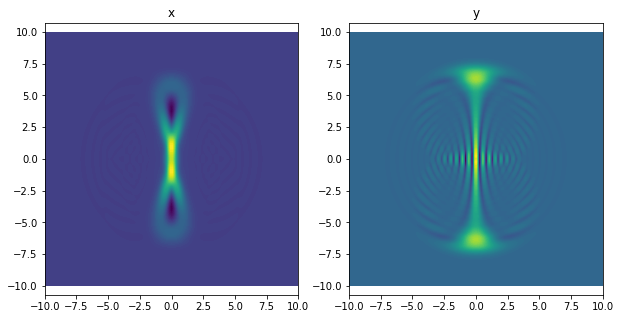

time =  79.0


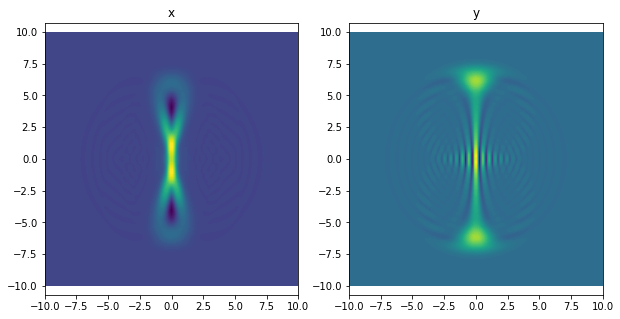

In [51]:
t_list = np.linspace(1,79,40)
for t in t_list:
    print('time = ', t)
    timeScan_2d(t_start = 0,
                t_stop = t,
                Nsample = 101,
                Omega_x = 0.5,
                Omega_y = 1,
                delta = 0,
                timeTurnOn_y=15)

## Interference fringes

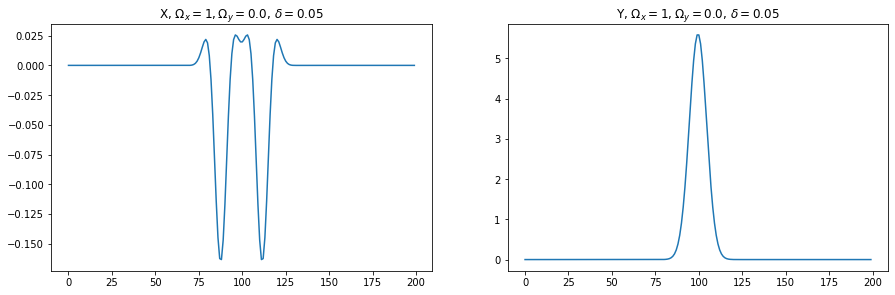

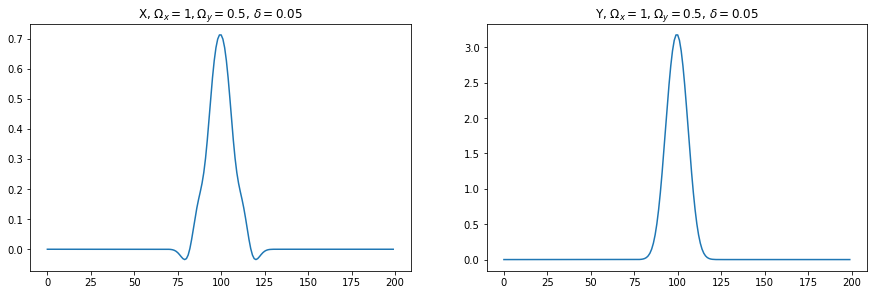

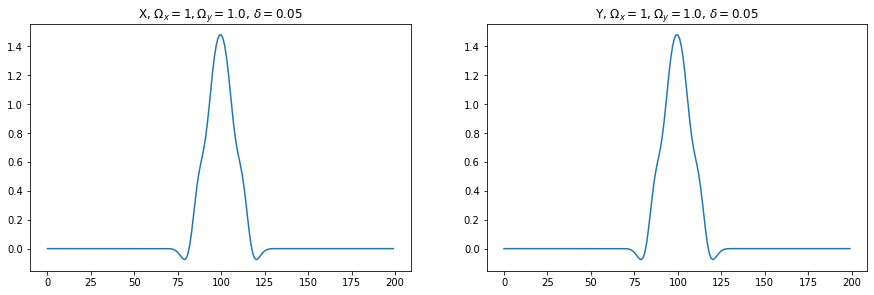

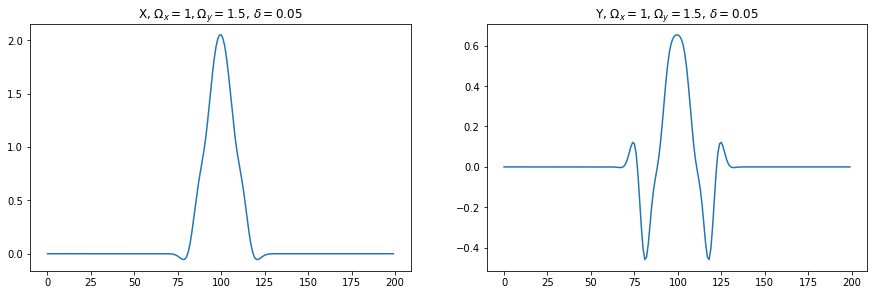

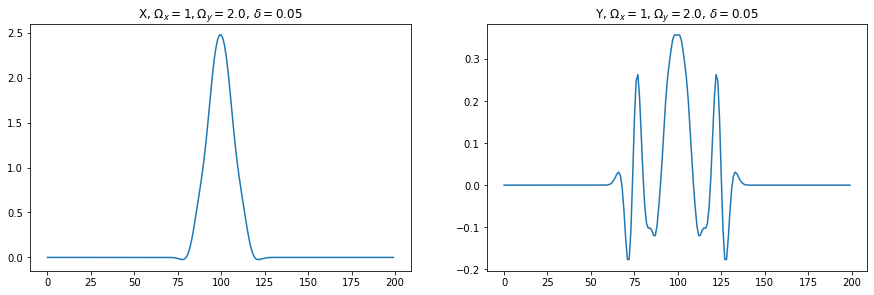

In [78]:
################################################
#
### Plot psi(x) and psi(y) at different Omega_y
#
################################################

# fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ylist = np.linspace(0, 2, 5)
for i in ylist:
    psi_2d_f = H_2d(Omega_x, i, delta, times, n0=n)[-1]
    psi_2d_f_x = psi_2d_f.ptrace(1)
    psi_2d_f_y = psi_2d_f.ptrace(2)
# W_2d_f = qt.wigner(psi_2d_f, xvec, yvec)
    W_2d_f_x = qt.wigner(psi_2d_f_x, xvec, yvec)
    W_2d_f_y = qt.wigner(psi_2d_f_y, xvec, yvec)
    plt.figure(figsize=(15, 10))
    ax1 = plt.subplot(2, 2, 1)
    ax1.plot(W2phi_x(W_2d_f_x))
#     ax1.set_title('str')
    ax1.set_title('X, $\Omega_x=1, \Omega_y=$'+str(round(i, 2))+', $\delta=$'+str(delta))
    ax2 = plt.subplot(2, 2, 2)
    ax2.plot(W2phi_x(W_2d_f_y))
    ax2.set_title('Y, $\Omega_x=1, \Omega_y=$'+str(round(i, 2))+', $\delta=$'+str(delta))
#     dirc = '../plots/'
#     plt.savefig('Omega_x=1_Omega_y='+str(round(i, 2))+'_delta='+str(delta)+'.png')

# plt.plot(W2phi_x(W_2d_f_x))

### 2d, time-independent

In [17]:
def H_noT(Omega_x, Omega_y, delta, times, eta=0.1, n0=0):
    H_1 = delta*(qt.tensor(qt.qeye(2), qt.tensor(qt.create(nMax)*qt.destroy(nMax), qt.qeye(nMax)))+qt.tensor(qt.qeye(2), qt.tensor(qt.qeye(nMax), qt.create(nMax)*qt.destroy(nMax))))
    H_2 = eta*(Omega_x*qt.tensor(qt.sigmax(), qt.tensor(qt.create(nMax)+qt.destroy(nMax), qt.qeye(nMax)))\
               +Omega_y*qt.tensor(qt.sigmay(), qt.tensor(qt.qeye(nMax), qt.create(nMax)+qt.destroy(nMax))))
    H = H_1 + H_2
    
    psi_0 = qt.tensor(qt.tensor(qt.basis(2, 0), qt.coherent(nMax, n0)), qt.coherent(nMax, n0))
    
    result = qt.mesolve(H, psi_0, times, [], [])
    return result.states

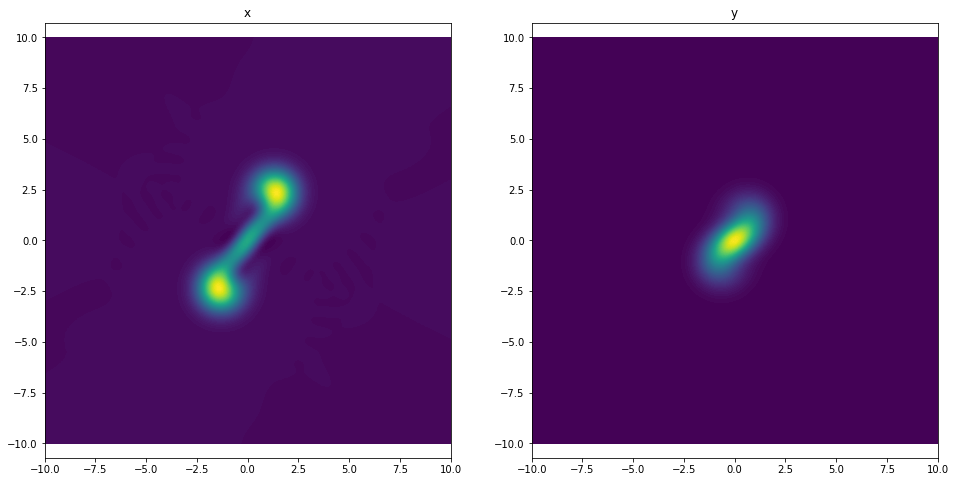

In [18]:
times = np.linspace(0, 20, 101)
Omega_x = 1
Omega_y = 0.5
delta = 0.05
n = 0

psi_2d_f = H_noT(Omega_x, Omega_y, delta, times, n0=n)[-1]
psi_2d_f_x = psi_2d_f.ptrace(1)
psi_2d_f_y = psi_2d_f.ptrace(2)
# W_2d_f = qt.wigner(psi_2d_f, xvec, yvec)
W_2d_f_x = qt.wigner(psi_2d_f_x, xvec, yvec)
W_2d_f_y = qt.wigner(psi_2d_f_y, xvec, yvec)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
cont0 = axes[0].contourf(xvec, yvec, W_2d_f_x, 100)
axes[0].axis('equal')
axes[0].set_title('x')
cont1 = axes[1].contourf(xvec, yvec, W_2d_f_y, 100)
axes[1].axis('equal')
axes[1].set_title('y')
plt.show()

### Test 1d $\psi(x)$:

http://www.stat.physik.uni-potsdam.de/~pikovsky/teaching/stud_seminar/Wigner_function.pdf

$$\psi(x)= \frac{1}{\psi^*(0)}\int W(x/2, p)e^{ipx/\hbar}dp$$
2d case:
$$W(x_1, x_2, p_1, p_2) = \frac{1}{h}\int e^{-i(p_1x_1+p_2x_2)}\psi(x_1+y_1/2, x_2+y_2/2)\psi^*(x_1-y_1/2, x_2-y_2/2)dy_1dy_2$$
$$\psi(x_1, x_2)= \frac{1}{\psi^*(0, 0)}\int W(x_1/2, x_2/2, p_1, p_2)e^{i(p_1x_1+p_2x_2)/\hbar}dp_1dp_2$$

In [19]:
def W2phi_x(W):
    phi_x = []
    for i in range(200):
        x = 0
        for j in range(200):
            x += W[i, j]*np.exp(1j*2*xvec[i]*yvec[j])
        phi_x.append(x)
    return phi_x

In [20]:
plt.plot(W2phi_x(W_f))
plt.show()

NameError: name 'W_f' is not defined

### 2d $\psi(x)$:

(Rewrite Wigner function?)

In [58]:
# phi_xy = []
# W_2d_test = W_2d_f.tolist()
# for i in range(200): # x_1
#     phi_x = []
#     for j in range(200): # p_1
#         for k in range(200): # x_2
#             x = 0
#             for l in range(200): # p_2
#                 x += W_2d_test[xvec[i], yvec[j], xvec[k], yvec[l]]*np.exp(1j*2*(xvec[i]*yvec[j]+xvec[k]*yvec[l]))
#         phi_x.append(x)
#     phi_xy.append(phi_x)

In [268]:
W_2d_test[0][1]

-0.002389194279098111

In [40]:
np.prod(psi_2d_f_x.shape)

400

In [50]:
psi_2d_f_x[0, -1]

0j

In [148]:
psi_2d_f

Quantum object: dims = [[2, 20, 20], [1, 1, 1]], shape = (800, 1), type = ket
Qobj data =
[[-2.55944839e-01+1.37098987e-01j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 1.06313891e-01-1.25008930e-01j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-2.44991270e-01+9.42008103e-02j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 1.79367207e-01+1.09971983e-01j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-5.36235578e-03-1.12809960e-01j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-3.72723862e-02+2.71746690e-02j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 1.42807371e-02+5.43975568e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-8.91527441e-04-4.17453811e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-7.31732599e-04+7.29144083e-04j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.15241894e-04+5.42233170e-05j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 3.11120101e-17-3.69117110e-17j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-2.08006212e-16-1.23902117e-16j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 1.05228583e-15+3.41303001e-15j]


In [3]:
qt.ket2dm(psi_2d_f).data.indptr

NameError: name 'psi_2d_f' is not defined

In [68]:
psi_2d_f.data

<1800x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 900 stored elements in Compressed Sparse Row format>